In [1]:
from modules.plotting import * # Importing all plotting functions
from modules.sampling import * # Importing all sampling functions

# Incorrect Approach Towards Uniform Sampling

In [2]:
theta, phi = sample_sphere(10000)             # Sampling 10000 tuple of (theta, phi) on the sphere uniformly
x, y, z = get_cartesian_coords(theta, phi)    # Converting previously generated tuples to Cartesian Coordinates

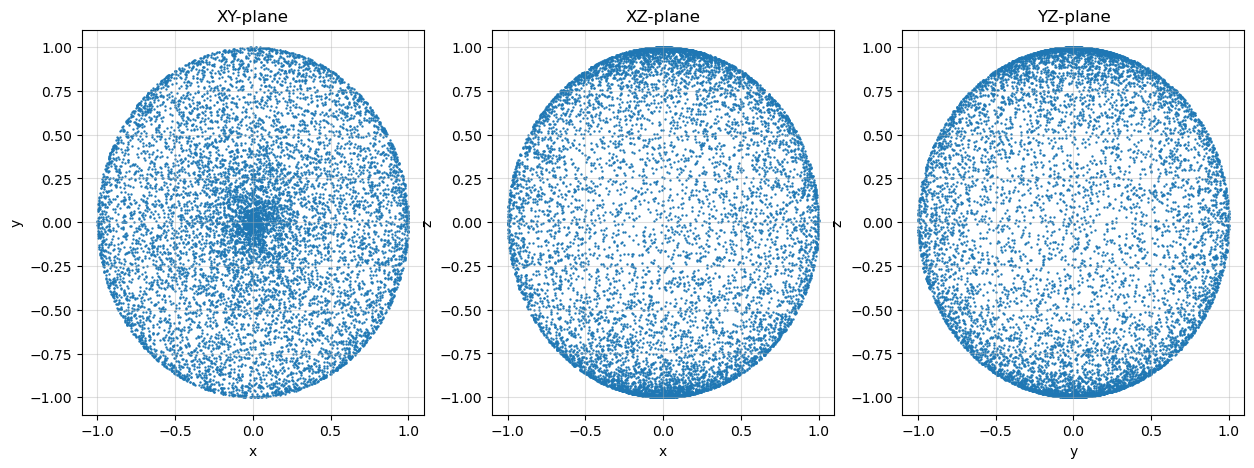

In [3]:
plot_scatter_2D(x, y, z)          # Scatter plot of the projections of generated points

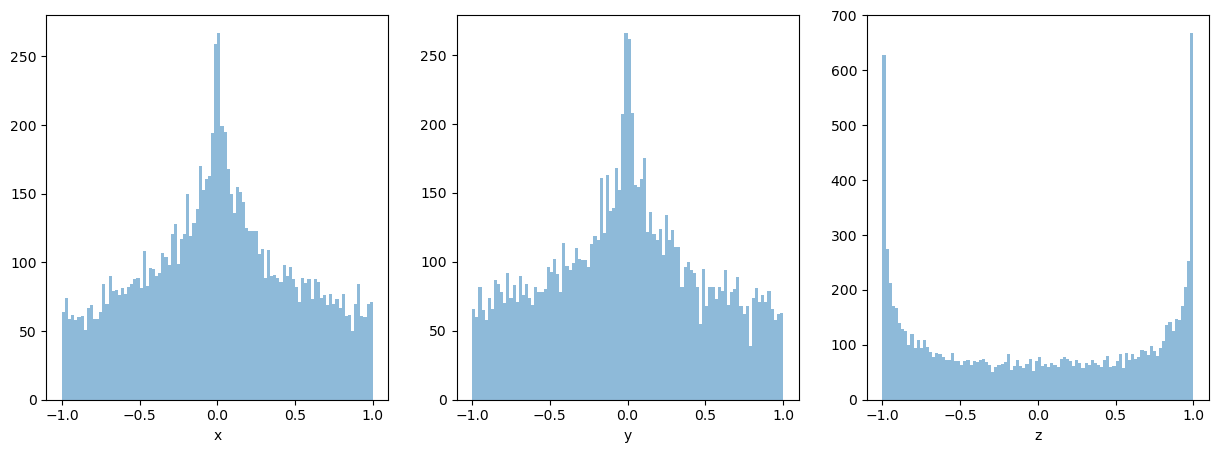

In [4]:
plot_histogram(x, y, z)     # Frequency distribution of the generated points on X, Y and Z axes

We can clearly observe that the points are not evenly distributed. This is because we sampled points using a uniform probablity distribution in polar coordinates. However, the coordinate conversion from polar to cartesian does not preserve the area element (and has a dependence on $\phi$ as per $d\Omega = cos\phi d\phi d\theta$). This results in 'pinching' on the area elements towards the poles and, thus, a higher density of points there (as demonstrated in top view i.e. XY projection).

We can correct for this by computing choosing the transformations of our probablity distribution function more carefully.

# Correct Approach Towards Uniform Sampling

There are multiple methods of achieving the desired result. However, one simple strategy could be the following. We sample two variables uniformly $$u \in [-1, +1] \text{ and } \theta \in (0, 2\pi]$$ Then, we make the following substitution $$\cos\phi = u$$ Following this, we can convert to cartesian coordinates by recalling $$\sin^2\phi + \cos^2\phi = \sin^2\phi + u^2= 1$$ or $$\sin\phi = \sqrt{1 - u^2}$$. The transformations to cartesian coordinates becomes $$x = \sqrt{1 - u^2}\cos\theta$$ $$y = \sqrt{1 - u^2}\sin\theta$$ $$z = u$$ 

To understand why this simple strategy works, we write the solid angle differential $$d\Omega = \sin\phi d\phi d\theta$$ and notice that our substitution $$u = \cos\phi \implies du = \sin\phi d\phi$$ or $$d\Omega = \sin\phi \frac{du}{\sin\phi} d\theta = du d\theta$$ which effectively rids the solid angle of any $\phi$ dependance.

In [9]:
x_correct, y_correct, z_correct = sample_sphere_correct(10000)

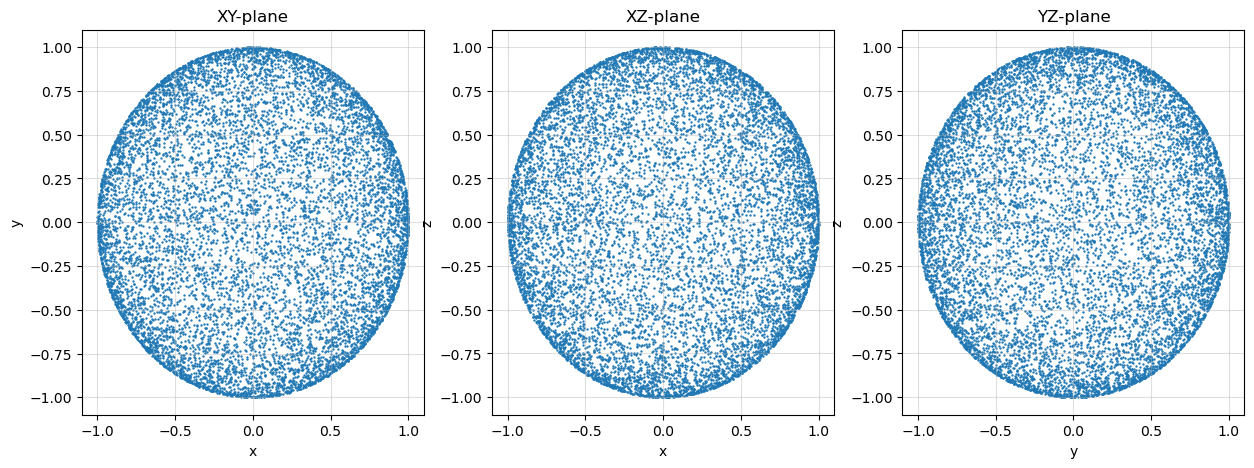

In [10]:
plot_scatter_2D(x_correct, y_correct, z_correct)

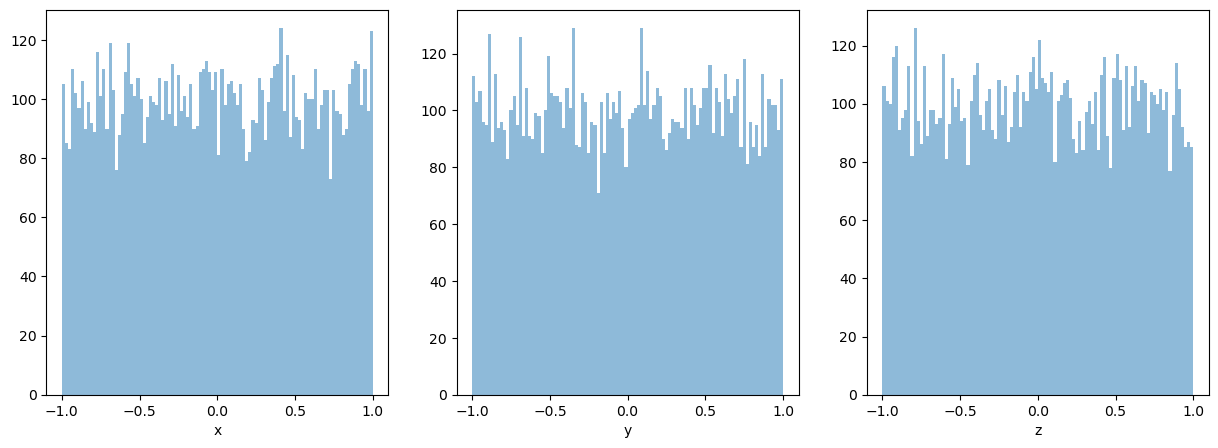

In [7]:
plot_histogram(x_correct, y_correct, z_correct)

# Additional Fun
Running the following cell (with the magic line un-commented) in a Jupyter Notebook environment (note this does not work on VSCode or Jupyter Labs) will render an an interactive plot 3D plot which can be moved around by the user to confirm that the points are bunched near poles in the first method and evenly distributed in the second method.

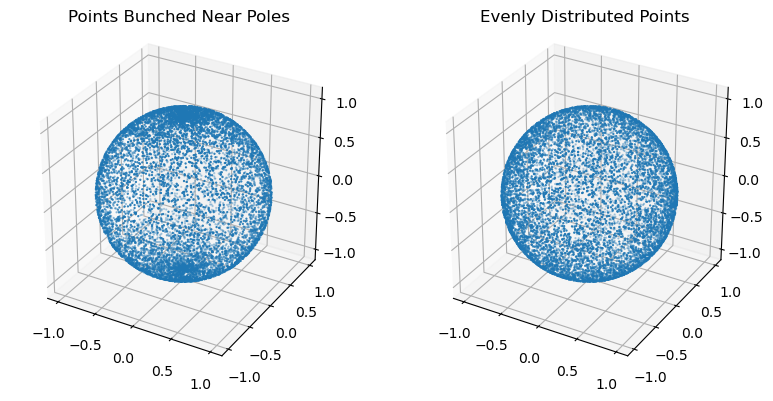

In [8]:
correct = x_correct, y_correct, z_correct
incorrect = x, y, z 

# %matplotlib notebook
plot_scatter_3D(correct, incorrect)